In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
filename = 'europa.csv'
data_unir = pd.read_csv(filename,sep=",",header=0)
data_unir.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,09/12/2020,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,08/12/2020,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,07/12/2020,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,06/12/2020,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,05/12/2020,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


In [3]:
data_unir=data_unir[data_unir['year'] == 2020]
data_unir.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,09/12/2020,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,08/12/2020,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,07/12/2020,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,06/12/2020,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,05/12/2020,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


In [4]:
data_unir.shape

(61833, 12)

In [5]:
data_unir.rename(columns = {'countriesAndTerritories':'Country Name', 'cases':'COVID Cases',
                                   'deaths':'COVID Deaths','popData2019':'Population data 2019',
                           'continentExp':'Continent'}, inplace = True)

In [6]:
#https://stackoverflow.com/questions/64323930/aggregating-rows-based-on-column-values-in-pandas-problem
data_covid = data_unir.groupby(['Continent','Country Name','year']).agg({'COVID Cases':'sum'
                                                                         ,'COVID Deaths':'sum'
                                                                         ,'Population data 2019':'mean'}).reset_index()
data_covid=data_covid.drop(['year'],axis='columns')
data_covid

,Continent,Country Name,COVID Cases,COVID Deaths,Population data 2019
0,Africa,Algeria,92102,2596,43053054.0
1,Africa,Angola,16188,371,31825299.0
2,Africa,Benin,3090,44,11801151.0
3,Africa,Botswana,12501,37,2303703.0
4,Africa,Burkina_Faso,4030,71,20321383.0
...,...,...,...,...,...
209,Oceania,Papua_New_Guinea,725,8,8776119.0
210,Oceania,Solomon_Islands,17,0,669821.0
211,Oceania,Vanuatu,1,0,299882.0
212,Oceania,Wallis_and_Futuna,3,0,NaN


In [7]:
filename = 'physicians_per_1000.csv'
data_docs = pd.read_csv(filename,sep=",",header=0)
data_docs.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.191352,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,0.035,NaN,NaN,NaN,NaN,0.063,...,0.2414,0.2846,0.2983,0.2850,0.2782,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.236817,NaN,NaN,NaN,NaN
4,Angola,AGO,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,0.067,NaN,NaN,NaN,NaN,0.076,...,NaN,NaN,NaN,NaN,NaN,0.214600,NaN,NaN,NaN,NaN
5,Albania,ALB,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,0.276,NaN,NaN,NaN,NaN,0.481,...,1.2683,1.2773,NaN,NaN,1.2164,NaN,2.1584,1.6471,NaN,NaN
6,Andorra,AND,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.3333,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.102697,NaN,NaN,NaN,NaN
8,United Arab Emirates,ARE,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.4767,1.7413,1.9953,2.2111,2.3710,2.435600,2.5278,NaN,NaN,NaN
9,Argentina,ARG,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,1.351,NaN,NaN,NaN,NaN,1.667,...,NaN,3.9385,NaN,3.9900,4.0013,3.990100,NaN,NaN,NaN,NaN


In [8]:
data_docs=data_docs.drop(['Indicator Name','Indicator Code','1960','1961','1962','1963','1964','1965','1966','1967','1968',
                          '1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982'
                          ,'1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996'
                          ,'1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010'
                          ,'2011','2012','2013','2014','2015'], axis='columns').copy()

In [9]:
data_docs

,Country Name,Country Code,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,0.191352,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,0.2782,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,NaN,0.236817,NaN,NaN,NaN,NaN
4,Angola,AGO,NaN,0.214600,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,0.7675,0.783300,0.7874,0.7923,NaN,NaN
264,Zambia,ZMB,0.0925,NaN,NaN,NaN,NaN,NaN


In [10]:
data_docs=data_docs.dropna(thresh=3).copy()

In [11]:
data_docs['Physicians per 1000'] = np.where(data_docs['2021'].isna(), 
                      np.where(data_docs['2020'].isna(),
                               np.where(data_docs['2019'].isna(),
                                        np.where(data_docs['2018'].isna(),
                                                 np.where(data_docs['2017'].isna(),data_docs['2016'], data_docs['2017'])
                                                 ,data_docs['2018']),
                                        data_docs['2019']),
                               data_docs['2020']),
                         data_docs['2021'])

In [12]:
data_docs

,Country Name,Country Code,2016,2017,2018,2019,2020,2021,Physicians per 1000
1,Africa Eastern and Southern,AFE,NaN,0.191352,NaN,NaN,NaN,NaN,0.191352
2,Afghanistan,AFG,0.2782,NaN,NaN,NaN,NaN,NaN,0.278200
3,Africa Western and Central,AFW,NaN,0.236817,NaN,NaN,NaN,NaN,0.236817
4,Angola,AGO,NaN,0.214600,NaN,NaN,NaN,NaN,0.214600
5,Albania,ALB,1.2164,NaN,2.1584,1.6471,NaN,NaN,1.647100
...,...,...,...,...,...,...,...,...,...
259,World,WLD,NaN,1.756699,NaN,NaN,NaN,NaN,1.756699
260,Samoa,WSM,0.3445,NaN,NaN,NaN,NaN,NaN,0.344500
263,South Africa,ZAF,0.7675,0.783300,0.7874,0.7923,NaN,NaN,0.792300
264,Zambia,ZMB,0.0925,NaN,NaN,NaN,NaN,NaN,0.092500


In [13]:
data_docs=data_docs.drop(['2016','2017','2018','2019','2020','2021'],axis='columns').copy()

In [14]:
data_docs

,Country Name,Country Code,Physicians per 1000
1,Africa Eastern and Southern,AFE,0.191352
2,Afghanistan,AFG,0.278200
3,Africa Western and Central,AFW,0.236817
4,Angola,AGO,0.214600
5,Albania,ALB,1.647100
...,...,...,...
259,World,WLD,1.756699
260,Samoa,WSM,0.344500
263,South Africa,ZAF,0.792300
264,Zambia,ZMB,0.092500


In [15]:
df3=pd.merge(data_covid,data_docs, on='Country Name')

In [16]:
df3=df3.drop(['Country Code'],axis='columns')

# Clustering

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.datasets import make_classification

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.mixture import GaussianMixture


In [18]:
df3.describe(include='all')

,Continent,Country Name,COVID Cases,COVID Deaths,Population data 2019,Physicians per 1000
count,112,112,1.120000e+02,112.000000,1.120000e+02,112.000000
unique,5,112,NaN,NaN,NaN,NaN
top,Europe,Mauritius,NaN,NaN,NaN,NaN
freq,33,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.863624e+05,9296.473214,5.370450e+07,2.194014
std,NaN,NaN,1.181839e+06,25918.863524,1.887522e+08,1.988137
min,NaN,NaN,1.000000e+00,0.000000,7.180800e+04,0.035800
25%,NaN,NaN,1.051200e+04,147.250000,3.402590e+06,0.436325
50%,NaN,NaN,9.133550e+04,1249.500000,1.099384e+07,1.769150
75%,NaN,NaN,2.707915e+05,5423.250000,3.670658e+07,3.523825


In [19]:
x_clust=df3.drop(['Country Name','Continent'],axis=1).copy()
y_clust=df3['Continent'].copy()

In [20]:
lenc = LabelEncoder()
y_clust=lenc.fit_transform(y_clust)

In [21]:
mms=MinMaxScaler()
x_clust=mms.fit_transform(x_clust)

In [22]:
#Se calcula el WCSS para diferentes no. de clusters y se grafica para aplicar el Elbow method 
wcss = [] 
for i in range(1, 11): 
    kmeans_wcss = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_wcss.fit(x_clust) 
    wcss.append(kmeans_wcss.inertia_)

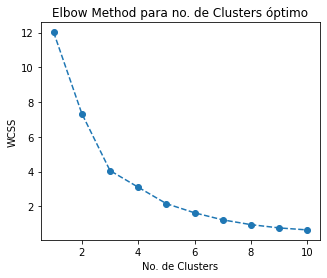

In [23]:


plt.figure(figsize=(5,4))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel('No. de Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method para no. de Clusters óptimo')
plt.show()

In [24]:
#Se calcula Silhouette Score para diferentes no. de clusters
silhouette_coefficients = []
for i in range(2,11): 
    model_km_ss = KMeans(n_clusters=i, random_state=42)
    # Fit the KMeans model
    model_km_ss.fit_predict(x_clust)
    # Calculate Silhoutte Score
    score = silhouette_score(x_clust, model_km_ss.labels_, metric='euclidean')
    # Print the score
    print('Numero de clusters ',i, 'Silhouetter Score: %.3f' % score)
    silhouette_coefficients.append(score)

Numero de clusters  2 Silhouetter Score: 0.531
Numero de clusters  3 Silhouetter Score: 0.557
Numero de clusters  4 Silhouetter Score: 0.568
Numero de clusters  5 Silhouetter Score: 0.503
Numero de clusters  6 Silhouetter Score: 0.526
Numero de clusters  7 Silhouetter Score: 0.523
Numero de clusters  8 Silhouetter Score: 0.476
Numero de clusters  9 Silhouetter Score: 0.522
Numero de clusters  10 Silhouetter Score: 0.523


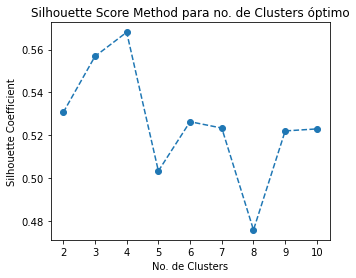

In [25]:
#Se grafican los Silhouette Scores respescto el no. de Clusters
#plt.style.use('tableau-colorblind10')
plt.figure(figsize=(5,4))
plt.plot(range(2,11),silhouette_coefficients,marker='o',linestyle='--')
plt.xticks(range(2, 11))
plt.xlabel("No. de Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('Silhouette Score Method para no. de Clusters óptimo')
plt.show()

In [26]:
# KMeans
model_KM = KMeans(n_clusters=4)
model_KM.fit(x_clust)
yhat_KM=model_KM.predict(x_clust)
yhat_KM

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0])

In [27]:
model_KM.cluster_centers_

array([[0.01251667, 0.01598636, 0.02214108, 0.11307995],
       [0.04781604, 0.0749287 , 0.01338924, 0.54268617],
       [0.84914417, 0.8951307 , 0.5500839 , 0.18887537],
       [0.00930717, 0.0261243 , 1.        , 0.23186746]])

In [28]:
#Se añaden los valores de cluster asignados a una nueva columna en el dataframe principal
#UPDF
df3['Cluster']=yhat_KM.copy()
df3

,Continent,Country Name,COVID Cases,COVID Deaths,Population data 2019,Physicians per 1000,Cluster
0,Africa,Algeria,92102,2596,43053054.0,1.7193,0
1,Africa,Angola,16188,371,31825299.0,0.2146,0
2,Africa,Benin,3090,44,11801151.0,0.0647,0
3,Africa,Botswana,12501,37,2303703.0,0.2893,0
4,Africa,Burundi,729,1,11530577.0,0.1001,0
...,...,...,...,...,...,...,...
107,Europe,Spain,1730575,47624,46937060.0,4.0299,1
108,Europe,Sweden,320098,7514,10230185.0,4.3310,1
109,Europe,Switzerland,372329,5378,8544527.0,4.3328,1
110,Oceania,Australia,28031,908,25203200.0,3.7595,1


In [29]:
#Valores medios del dataframe principal segun el cluster asignado
cc=(pd.concat([df3.groupby(by='Cluster').size(),df3.groupby(by='Cluster').mean()],axis=1))
cc.columns.values[0:1]='Frecuencia'
cc

,Frecuencia,COVID Cases,COVID Deaths,Population data 2019,Physicians per 1000
Cluster,,,,,
0,72,1.237170e+05,2899.958333,3.181573e+07,0.983874
1,37,4.726195e+05,13592.216216,1.926813e+07,4.585735
2,2,8.393026e+06,162378.500000,7.887336e+08,1.619350
3,1,9.199400e+04,4739.000000,1.433784e+09,1.979800


In [30]:
#Se importa libreria para aplicar PCA, se define modelo y se entrena
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(x_clust)

PCA()

In [31]:
pca.explained_variance_ratio_.cumsum()

array([0.53864416, 0.89079717, 0.98730506, 1.        ])

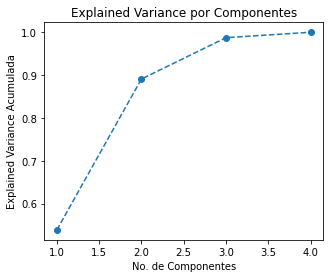

In [32]:
#Se grafica la Explained Variance según aumenta la cantidad de componentes utilizados
plt.figure(figsize=(5,4))
plt.plot(range(1,5),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance por Componentes')
plt.xlabel('No. de Componentes')
plt.ylabel('Explained Variance Acumulada')
plt.show()

In [33]:
#Se entrena el modelo y generan valores de componentes con la cantidad de componentes óptima
pca=PCA(n_components=2)
x_clust_pca=pca.fit_transform(x_clust)

In [34]:
x_clust_pca

array([[-6.78227746e-02, -2.85306724e-02],
       [-2.44186340e-01,  1.07410279e-03],
       [-2.62276972e-01, -3.31206658e-03],
       [-2.36597867e-01, -1.29258530e-02],
       [-2.58325674e-01, -4.75094254e-03],
       [-2.63358477e-01, -1.41096343e-03],
       [-2.58686782e-01, -7.53067433e-03],
       [-2.55219411e-01,  4.40035035e-02],
       [-1.91713857e-01, -2.48868047e-02],
       [-2.56056911e-01,  5.74567048e-03],
       [-2.59936698e-01, -2.83161602e-03],
       [-2.47727518e-01,  1.84815177e-02],
       [-2.76413828e-02, -5.69645103e-02],
       [-2.65242428e-01,  6.16591666e-04],
       [-2.54607435e-01, -1.80587852e-03],
       [-2.48107629e-01, -8.51686774e-03],
       [ 1.97895342e-02, -8.16359994e-02],
       [-1.70880547e-01,  2.97072592e-02],
       [-2.59362742e-01,  3.74432489e-03],
       [-2.01819377e-01, -2.13170721e-02],
       [-2.64510426e-01,  1.46846179e-03],
       [-2.20571499e-01,  6.17240702e-02],
       [-2.56072950e-01, -4.39220601e-03],
       [-2.

In [35]:
#Se entrena el modelo K means definido previamente con las resultantes después de aplicar PCA
model_KM.fit(x_clust_pca)
yhat_KM_pca=model_KM.predict(x_clust_pca)
yhat_KM_pca

array([3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 2, 3, 0, 0, 0, 1, 3, 1, 1,
       3, 1, 1, 1, 0, 3, 3, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 3, 3, 3,
       3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0,
       0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 0, 0,
       3, 1])

In [36]:
#Se obtienen los centroides
model_KM.cluster_centers_

array([[ 0.35682226, -0.05662629],
       [-0.20719464,  0.01849277],
       [ 0.27141832,  1.24102148],
       [ 0.03245686, -0.05910344]])

In [37]:
#Se genera un data frame con las entradas y clusters originales, las obtenidas con PCA y 
#los clusters que generó
df3=pd.concat([df3,pd.DataFrame(x_clust_pca),pd.DataFrame(yhat_KM_pca)],axis=1)
df3.columns.values[-3:]=['Componente PCA 1', 'Componente PCA 2', 'Cluster PCA']
df3

,Continent,Country Name,COVID Cases,COVID Deaths,Population data 2019,Physicians per 1000,Cluster,Componente PCA 1,Componente PCA 2,Cluster PCA
0,Africa,Algeria,92102,2596,43053054.0,1.7193,0,-0.067823,-0.028531,3
1,Africa,Angola,16188,371,31825299.0,0.2146,0,-0.244186,0.001074,1
2,Africa,Benin,3090,44,11801151.0,0.0647,0,-0.262277,-0.003312,1
3,Africa,Botswana,12501,37,2303703.0,0.2893,0,-0.236598,-0.012926,1
4,Africa,Burundi,729,1,11530577.0,0.1001,0,-0.258326,-0.004751,1
...,...,...,...,...,...,...,...,...,...,...
107,Europe,Spain,1730575,47624,46937060.0,4.0299,1,0.280924,0.146865,0
108,Europe,Sweden,320098,7514,10230185.0,4.3310,1,0.240366,-0.089428,0
109,Europe,Switzerland,372329,5378,8544527.0,4.3328,1,0.238601,-0.094373,0
110,Oceania,Australia,28031,908,25203200.0,3.7595,1,0.162033,-0.105561,3


In [38]:
#Valores medios a partir de los clusters generados con las entradas de PCA
cc_ca=(pd.concat([df3.groupby(by='Cluster PCA').size(),df3.groupby(by='Cluster PCA').mean()],axis=1))
cc_ca.columns.values[0:1]='Frecuencia'
cc_ca

,Frecuencia,COVID Cases,COVID Deaths,Population data 2019,Physicians per 1000,Cluster,Componente PCA 1,Componente PCA 2
Cluster PCA,,,,,,,,
0,25,6.122083e+05,18480.280000,2.464556e+07,5.182304,1.000000,0.356822,-0.056626
1,51,1.109049e+05,2796.235294,6.671246e+07,0.492596,0.058824,-0.207195,0.018493
2,2,8.393026e+06,162378.500000,7.887336e+08,1.619350,2.000000,0.271418,1.241021
3,34,1.625054e+05,3289.205882,1.232243e+07,2.582674,0.352941,0.032457,-0.059103


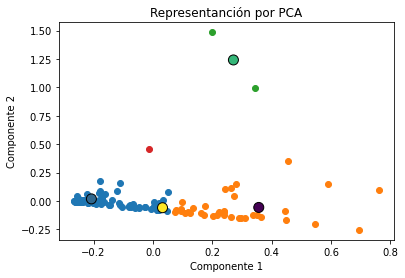

In [39]:
#Se genera un gráfico de dispersión de los clusters con los valores de PCA y sus centroides
plt.figure(figsize=(6,4))
clust_val = np.unique(yhat_KM_pca)
for val in clust_val:
 row_ix = np.where(yhat_KM == val)
 plt.scatter(x_clust_pca[row_ix, 0], x_clust_pca[row_ix, 1])
plt.scatter(model_KM.cluster_centers_[:,0], model_KM.cluster_centers_[:,1], 
                s=100, c=clust_val, edgecolors='black')
plt.title('Representanción por PCA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

In [40]:
# Mean Shift
model_MS=MeanShift()
yhat_MS=model_MS.fit_predict(x_clust_pca)
clusters_MS=np.unique(yhat_MS)

# Agglomerativa clustering
model_AC=AgglomerativeClustering(n_clusters=4)
yhat_AC=model_AC.fit_predict(x_clust_pca)
clusters_AC=np.unique(yhat_AC)

# Gaussian Mixture
model_GM=GaussianMixture(n_components=4)
model_GM.fit(x_clust_pca)
yhat_GM=model_GM.predict(x_clust_pca)
clusters_GM=np.unique(yhat_GM)

# DBSCAN
model_DB = DBSCAN(eps=0.2, min_samples=9)
yhat_DB = model_DB.fit_predict(x_clust_pca)
clusters_DB = np.unique(yhat_DB)

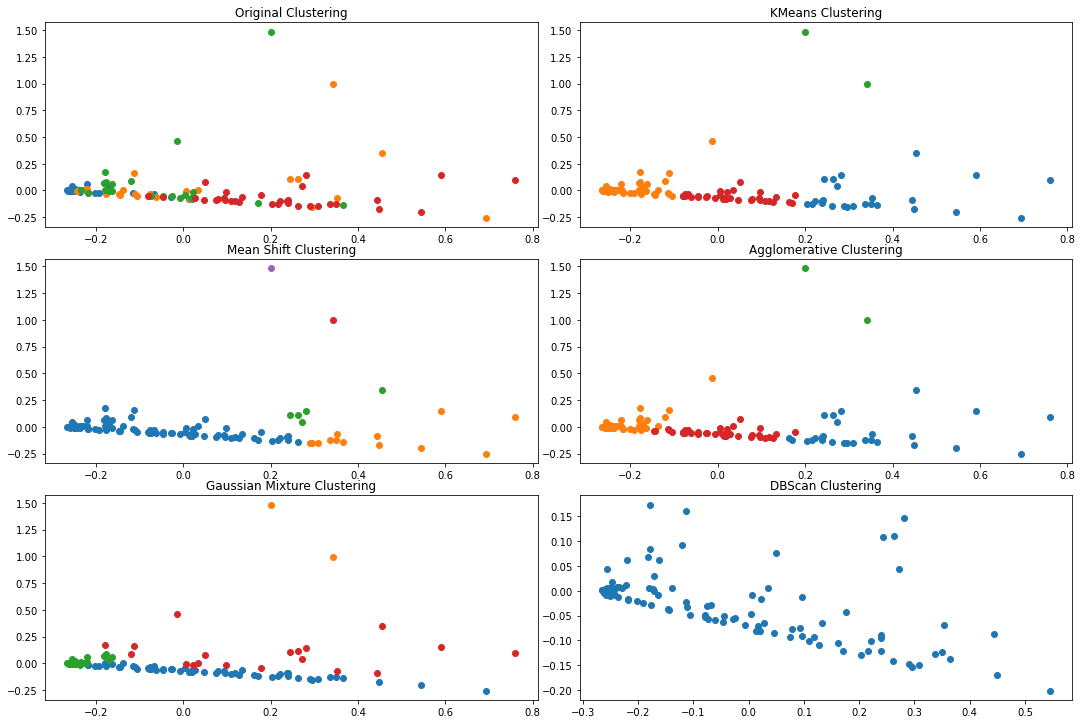

In [41]:
#Comparación gráfica de algoritmos de clustering
yhat=[y_clust,yhat_KM_pca,yhat_MS,yhat_AC,yhat_GM,yhat_DB]
categories = ['Original','KMeans','Mean Shift','Agglomerative','Gaussian Mixture','DBScan']
fig, ax = plt.subplots(3,2, figsize=(15,10))
fig.tight_layout()
plt.style.use('tableau-colorblind10')
i=0
p=0
m=1
while m <6:
    for j in range(0,3):
        for i in range(0,2):
            if i==0 and j==0:
                for class_value in range(0,4):
                    row_ix = np.where(y_clust==class_value)
                    ax[0,0].scatter(x_clust_pca[row_ix, 0], x_clust_pca[row_ix, 1])
                ax[0,0].set_title(categories[m-1]+' Clustering')
            else:
                for p in range(0,5):
                    row_ix = np.where (yhat[m] == p)
                    ax[j,i].scatter(x_clust_pca[row_ix,0], x_clust_pca[row_ix,1])
                ax[j,i].set_title(categories[m]+' Clustering')
                m+=1             
plt.show()

# Regresión con redes neuronales

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
print(tf.__version__)

2.9.1


In [43]:
y_enc=pd.get_dummies(df3['Cluster'])

In [44]:
X_train, X_test, y_train, y_test=train_test_split(x_clust,y_enc,test_size=0.2)

In [45]:
#Clasificación con NN para generar modelo predictor de cluster/clase a la que pertenecen los países
# Capa de entrada para no. de atributos, 256 neuronas, y funcion de activacion ReLU
# Dos capas intermedias con 128 y 64 neuronas y función de activación 'relu'
# Capa de salida con posibles valores igual al número de clases y función de activación softmax

model_nn = Sequential([
Dense(256, input_dim=X_train.shape[1], activation='relu'),
Dense(128, activation='relu'),
Dense(64, activation='relu'),
Dense(4, activation='softmax')
])

# Se compila el modelo con pérdida para clasificación y métrica de precisión
model_nn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [46]:
model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1280      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 42,692
Trainable params: 42,692
Non-trainable params: 0
_________________________________________________________________


In [47]:
y_train=pd.get_dummies(y_train)

In [48]:
# Calcularemos los resultados de la validacion con el 20% de la info de entrenamiento
nn_history=model_nn.fit(X_train,y_train,epochs=100
                 , verbose=1
                 ,validation_split=0.2
                 )

Epoch 1/100
3/3 [==============================] - 2s 390ms/step - loss: 1.3629 - accuracy: 0.6479 - val_loss: 1.3474 - val_accuracy: 0.5556
Epoch 2/100
3/3 [==============================] - 0s 86ms/step - loss: 1.3140 - accuracy: 0.6620 - val_loss: 1.3157 - val_accuracy: 0.5556
Epoch 3/100
3/3 [==============================] - 0s 55ms/step - loss: 1.2679 - accuracy: 0.6901 - val_loss: 1.2793 - val_accuracy: 0.5556
Epoch 4/100
3/3 [==============================] - 0s 65ms/step - loss: 1.2157 - accuracy: 0.7183 - val_loss: 1.2386 - val_accuracy: 0.5556
Epoch 5/100
3/3 [==============================] - 0s 52ms/step - loss: 1.1586 - accuracy: 0.6479 - val_loss: 1.1954 - val_accuracy: 0.5556
Epoch 6/100
3/3 [==============================] - 0s 56ms/step - loss: 1.0920 - accuracy: 0.6338 - val_loss: 1.1454 - val_accuracy: 0.5556
Epoch 7/100
3/3 [==============================] - 0s 64ms/step - loss: 1.0199 - accuracy: 0.6338 - val_loss: 1.0902 - val_accuracy: 0.5556
Epoch 8/100
3/3 [==

In [49]:
hist=pd.DataFrame(nn_history.history)
hist['epoch']=nn_history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.013954,1.0,0.127974,0.944444,95
96,0.012385,1.0,0.138703,0.944444,96
97,0.011305,1.0,0.148680,0.944444,97
98,0.011264,1.0,0.150108,0.944444,98
99,0.011026,1.0,0.145307,0.944444,99


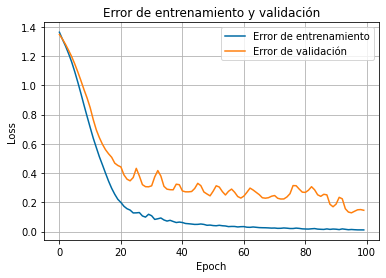

In [50]:
plt.figure(figsize=(6,4))
plt.plot(hist['loss'], label='Error de entrenamiento')
plt.plot(hist['val_loss'], label='Error de validación')
plt.title('Error de entrenamiento y validación')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
#Se extraen las métricas evualuando el modelo con el conjunto de entrenamiento y se imprime la métrica de interés
loss, acc = model_nn.evaluate(X_train, y_train, verbose=2)
print('Error de entrenamiento en Red Neuronal (Loss): {:5.4f}'.format(loss))

3/3 - 0s - loss: 0.0377 - accuracy: 0.9888 - 49ms/epoch - 16ms/step
Error de entrenamiento en Red Neuronal (Loss): 0.0377


In [52]:
y_nn_pred_train = (model_nn.predict(X_train)).argmax(axis=1)
y_nn_pred_test = (model_nn.predict(X_test)).argmax(axis=1)

1/1 [==============================] - 0s 29ms/step


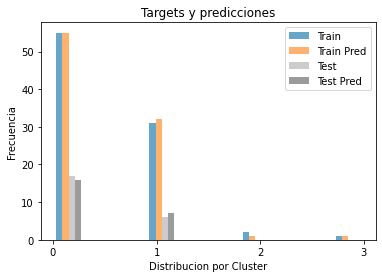

In [53]:
#Se grafican las predicciones utilizando los datos de entrada de entrenamiento y prueba

fig, ax = plt.subplots()
ax.hist([y_train.idxmax(axis=1),y_nn_pred_train,
         y_test.idxmax(axis=1),y_nn_pred_test],
        alpha=0.6, label=['Train','Train Pred','Test','Test Pred'])
plt.xlabel('Distribucion por Cluster')
plt.ylabel('Frecuencia')
plt.legend(loc = "upper right")
plt.title("Targets y predicciones")
plt.xticks(range(0,4))
plt.show()

In [54]:
#Matriz de confusión de valores de prueba y predichos por el modelo
#Evaluacion
print('Matriz de confusión Red Neuronal. Datos de entrenamiento \n',confusion_matrix(y_train.idxmax(axis=1),y_nn_pred_train))
print('Matriz de confusión Red Neuronal. Datos de prueba \n',confusion_matrix(y_test.idxmax(axis=1),y_nn_pred_test))

Matriz de confusión Red Neuronal. Datos de entrenamiento 
 [[55  0  0  0]
 [ 0 31  0  0]
 [ 0  1  1  0]
 [ 0  0  0  1]]
Matriz de confusión Red Neuronal. Datos de prueba 
 [[16  1]
 [ 0  6]]


In [55]:
print('Entrenamiento RN \n',classification_report(y_train.idxmax(axis=1),y_nn_pred_train,zero_division=True))
print('Prueba RN \n',classification_report(y_test.idxmax(axis=1),y_nn_pred_test,zero_division=True))

Entrenamiento RN 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.97      1.00      0.98        31
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1

    accuracy                           0.99        89
   macro avg       0.99      0.88      0.91        89
weighted avg       0.99      0.99      0.99        89

Prueba RN 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.86      1.00      0.92         6

    accuracy                           0.96        23
   macro avg       0.93      0.97      0.95        23
weighted avg       0.96      0.96      0.96        23

